In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
import autograd.numpy as np
import pandas as pd
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

ImportError: No module named 'mlrefined_libraries'

## Linear Supervised Learning Series

# Part 3: The perceptron

In this post we discuss the *perceptron* - a historically significant and useful way of thinking about linear classification.

Press the button 'Toggle code' below to toggle code on and off for entire this presentation.

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# 1.  The perceptron

In this Section we derive the *perceptron*, which provides a foundational perceptron perspective on two-class classification.  We will see - among other things - our first use of the *rectified linear unit* as well as the origin of phrase *softmax* in *softmax cost function*.

## 1.1 The perceptron cost function

With two-class classification we have a training set of $P$ points $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ where $y_p$'s take on just two label values from $\{-1, +1\}$. 

As we saw with logistic regression the decision boundary was formally given as a hyperplane

\begin{equation}
w_0+\mathbf{x}^{T}\mathbf{w}^{\,} = 0
\end{equation}

When hyperplane parameters $w_0$ and $\mathbf{w}$ are chosen well we have (for most points)

\begin{equation}
\begin{array}{cc}
w_0+\mathbf{x}_{p}^{T}\mathbf{w}>0 & \,\,\,\,\text{if} \,\,\, y_{p}=+1\\
w_0+\mathbf{x}_{p}^{T}\mathbf{w}<0 & \,\,\,\,\text{if} \,\,\, y_{p}=-1
\end{array}
\end{equation}

<p>
<img src= '../../../mlrefined_images/superlearn_images/Fig_4_1.png' width="80%" height="auto"/>
</p>

The two (ideal) conditions again:

\begin{equation}
\begin{array}{cc}
w_0+\mathbf{x}_{p}^{T}\mathbf{w}>0 & \,\,\,\,\text{if} \,\,\, y_{p}=+1\\
w_0+\mathbf{x}_{p}^{T}\mathbf{w}<0 & \,\,\,\,\text{if} \,\,\, y_{p}=-1
\end{array}
\end{equation}

We can combine them in a single equation (because $y_p \in \{-1,+1\}$)

\begin{equation}
-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)<0
\end{equation}

written equivalently - using ReLU function - as

\begin{equation}
\text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)=0
\end{equation}

Lets look at the expression $\text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)$ more closely:

- **It is always non-negative:** it returns zero if $\mathbf{x}_{p}$ is classified correctly, and returns a *positive value* if classified incorrectly.

- **It is convex:** because it is the composition of ReLU (itself a convex function) and a linear function.

We sum up this expression over the entire dataset, giving the so-called *perceptron* or *ReLU* cost

\begin{equation}
g\left(w_0,\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)
\end{equation}

The ReLU cost 

\begin{equation}
g\left(w_0,\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)
\end{equation}

- ** is convex:** because each summand is convex!

- ** has only a single (discontinuous) derivative:** because of the ReLU function. Therefore we can only use first order methods for its optimization.

- ** has a trivial and undesired solution at zero:** when $w_0=0$ and $\mathbf{w} = \mathbf{0}$, we have $g\left(0,\mathbf{0}\right) = 0$.

#### <span style="color:#a50e3e;">Example 1: </span> Using gradient descent to minimize the ReLU cost

The partial derivative of one summand with respect to weights in $\mathbf{w}$

\begin{equation}
\frac{\partial}{\partial w_n}  \text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)= \begin{cases} -y_p x_{p,n} \,\,\,\text{if} \,\,\, -y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)>0 \\ 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \text{else} \end{cases}
\end{equation}

Similarly for $w_0$ we have

\begin{equation}
\frac{\partial}{\partial w_0}  \text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)= \begin{cases} -y_p \,\,\,\,\,\,\,\,\,\,\, \text{if} \,\,\, -y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)>0 \\ 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \text{else} \end{cases}
\end{equation}

What is noticeable about the gradient here?

- Unlike a smooth cost like softmax, the magnitude of the full ReLU cost function's gradient will not necessarily diminish to zero close to a global minimum and could stay fixed (in magnitude) based on the dataset.

- Thus, it is possible for gradient descent with a fixed steplength value $\alpha$ to oscillate and 'zig-zag' around, never going to a minimum.

- In this case we need to either tune a fixed steplength or choose a diminishing one, e.g., $\alpha = \frac{1}{k}$ where $k$ is the step number.

We test out the perceptron on the 3-d dataset used in the previous (logistic regression) example

In [ ]:
# load in dataset
data = np.loadtxt('../../mlrefined_datasets/superlearn_datasets/3d_classification_data_v0.csv',delimiter = ',')

# define the input and output of our dataset - assuming arbitrary N > 2 here
x = data[:,:-1]
y = data[:,-1]
y.shape = (len(y),1)

The perceptron / relu cost function - a Python implementation

In [ ]:
# the relu cost function
def relu(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        a_p = w[0] + sum([a*b for a,b in zip(w[1:],x_p)])
        cost += np.maximum(0,-y_p*a_p)
    return cost

<IPython.core.display.Javascript object>


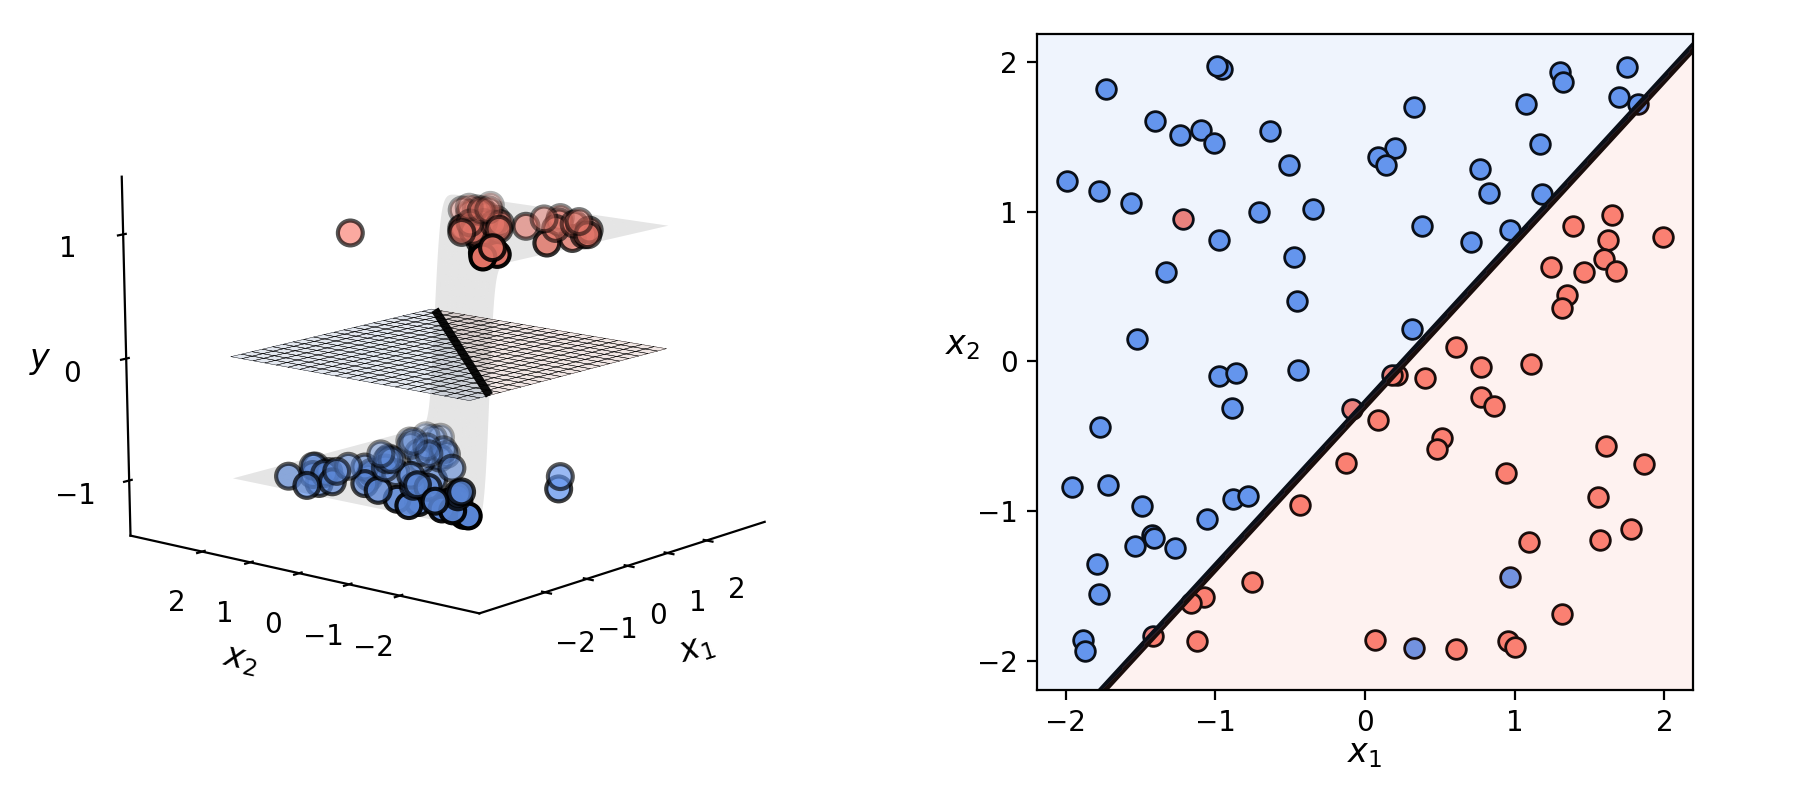

In [6]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_hist = opt.gradient_descent(g = relu,w = np.random.randn(np.shape(x)[1]+1,1),max_its = 50,alpha = 10**-2,steplength_rule = 'diminishing')

# create instance of 3d demos
demo5 = superlearn.classification_3d_demos.Visualizer(data)

# draw the final results
demo5.static_fig(w_hist,view = [15,-140])

## 1.2  The smooth softmax approximation to the ReLU perceptron cost

The *softmax* function defined as

\begin{equation}
\text{soft}\left(s_1,s_2,...,s_N\right) = \text{log}\left(e^{s_1} + e^{s_2} + \cdots + e^{s_N} \right)
\end{equation}

is a generic smooth approximation to the *max* function

\begin{equation}
\text{soft}\left(s_1,s_2,...,s_N\right) \approx \text{max}\left(s_1,s_2,...,s_N\right)
\end{equation}

Why? Say, $s_j$ is the maximum and (much) larger than the rest. Then, $e^{s_{j}}$ dominates the sum and we have that

\begin{equation}
\text{log}\left(e^{s_1} + e^{s_2} + \cdots + e^{s_N} \right) \approx \text{log}\left(e^{s_j} \right) = s_j 
\end{equation}

#### <span style="color:#a50e3e;">Example 1: </span> Softmax approximation to the ReLU

The ReLU function

\begin{equation}
g\left(s\right)=\mbox{max}\left(0,\,s\right)
\end{equation}

and its smooth softmax approximation

\begin{equation}
 g\left(s\right)=\mbox{soft}\left(0,\,s\right)=\mbox{log}\left(1+e^{s}\right)
\end{equation}

<p>
<img src= '../../../mlrefined_images/superlearn_images/Fig_4_2.png' width="50%" height="auto"/>
</p>

Recall the ReLU perceptron cost function 

\begin{equation}
g\left(w_0,\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{max}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)
\end{equation}

We replace the $p^{th}$ summand with its softmax approximation

\begin{equation}
\text{soft}\left(0,\,-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)= \text{log}\left(e^{0} + e^{-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right) = \text{log}\left(1 + e^{-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right)
\end{equation}

giving the smooth cost function 

\begin{equation}
g\left(w_0,\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{log}\left(1 + e^{-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right)
\end{equation}

Where have you seen this cost before?

\begin{equation}
g\left(w_0,\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{log}\left(1 + e^{-y_{p}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right)
\end{equation}

- This is the *softmax cost* previously derived from the logistic regression perspective on two-class classification.

- It is called *softmax* since it derives from the general softmax approximation to the max function.

- It is still convex (like the ReLU cost) but no trivial solution at zero!

## 1.3  Predictions, misclassifications, and accuracy with the perceptron cost

Predictions, misclassifications, the accuracy, etc., are all found in the same manner described for logistic regression.